<a href="https://colab.research.google.com/github/shraddhaagarwal10/Cheminformatics-Predicting-Aqueous-Solubility-of-Molecules/blob/main/Cheminformatics_Predicting_Aqueous_Solubility_of_Molecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**

## Installing rdkit 

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y

--2021-08-19 12:34:24--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   134MB/s    in 0.6s    

2021-08-19 12:34:25 (134 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - \ 

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

## Reading the Dataset

In [ ]:
comp = pd.read_csv("delaney.csv")
comp

,SMILES,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L)
0,ClCC(Cl)(Cl)Cl,-2.180,-2.794
1,CC(Cl)(Cl)Cl,-2.000,-2.232
2,ClC(Cl)C(Cl)Cl,-1.740,-2.549
3,ClCC(Cl)Cl,-1.480,-1.961
4,FC(F)(Cl)C(F)(Cl)Cl,-3.040,-3.077
...,...,...,...
1139,CNC(=O)C(C)SCCSP(=O)(OC)(OC),1.144,-1.446
1140,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,-4.925,-4.377
1141,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,-3.893,-3.913
1142,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,-3.790,-3.642


## Verifying for null values in the dataset

In [ ]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SMILES                                1144 non-null   object 
 1   measured log(solubility:mol/L)        1144 non-null   float64
 2   ESOL predicted log(solubility:mol/L)  1144 non-null   float64
dtypes: float64(2), object(1)
memory usage: 26.9+ KB


## Convert molecules of the column 'SMILES' to rdkit object

In [ ]:
from rdkit import Chem
mol=[Chem.MolFromSmiles(drug) for drug in comp.SMILES]
print(len(mol))

1144


In [ ]:
mol

 ...]

## Calculating Molecule Descriptors

**cLogP, Molecular weight, Rotatable bonds, H-bond donor count, H-bond acceptor count, Polar surface area**

In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
def parameters(smiles, verbose=False):
    base_data = []
    for s in smiles:
        mol=Chem.MolFromSmiles(s)
        base_data.append(mol)

    data = np.arange(1,1)
    r = 0
    for m in base_data:
        Mol_LogP = Descriptors.MolLogP(m)
        Mol_Weight = Descriptors.MolWt(m)
        Rotable_Bonds = Descriptors.NumRotatableBonds(m)
        H_bond_donor = Lipinski.NumHDonors(m)
        H_bond_acceptor = Lipinski.NumHAcceptors(m)
        Polar_Surface_Area = Descriptors.TPSA(m)

        row_data = np.array([Mol_LogP,
                             Mol_Weight,
                             Rotable_Bonds,
                             H_bond_donor,
                             H_bond_acceptor,
                             Polar_Surface_Area])
        if (r==0):
            data = row_data
        else:
            data = np.vstack([data, row_data])
        r = r + 1

    column_names = ["cLogP", "Molecular weight", "Rotatable bonds", "H-bond donor count", "H-bond acceptor count", "Polar surface area"]
    df = pd.DataFrame(data=data, columns=column_names)
    return df

In [ ]:
descriptors = parameters(comp.SMILES)
descriptors

,cLogP,Molecular weight,Rotatable bonds,H-bond donor count,H-bond acceptor count,Polar surface area
0,2.59540,167.850,0.0,0.0,0.0,0.00
1,2.37650,133.405,0.0,0.0,0.0,0.00
2,2.59380,167.850,1.0,0.0,0.0,0.00
3,2.02890,133.405,1.0,0.0,0.0,0.00
4,2.91890,187.375,1.0,0.0,0.0,0.00
...,...,...,...,...,...,...
1139,1.98820,287.343,8.0,1.0,6.0,64.63
1140,3.42130,286.114,2.0,0.0,3.0,46.61
1141,3.60960,308.333,4.0,1.0,4.0,67.51
1142,2.56214,354.815,3.0,3.0,4.0,109.49


**Aromatic proportion**

In [ ]:
def Aro_Atoms(mol):
    aro_atoms = [mol.GetAtomWithIdx(i).GetIsAromatic() for i in range(mol.GetNumAtoms())]
    
    a_atoms = []
    for a in aro_atoms:
        if a == True:
            a_atoms.append(a)
    sum_a_atoms = sum(a_atoms)
    return sum_a_atoms

In [ ]:
aromatic_proportion = [Aro_Atoms(element)/Descriptors.HeavyAtomCount(element) for element in mol]
aromatic_proportion = pd.DataFrame(aromatic_proportion, columns=['Aromatic proportion'])
aromatic_proportion

,Aromatic proportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


**Non carbon proportion**

In [ ]:
non_carbon_proportion = [Lipinski.NumHeteroatoms(element)/Lipinski.HeavyAtomCount(element) for element in mol]
non_carbon_proportion = pd.DataFrame(non_carbon_proportion, columns=['Non carbon proportion'])
non_carbon_proportion

,Non carbon proportion
0,0.666667
1,0.600000
2,0.666667
3,0.600000
4,0.750000
...,...
1139,0.500000
1140,0.333333
1141,0.173913
1142,0.347826


## Obtaining X Matrix by concatinating all the computed descriptors

In [ ]:
X = pd.concat([descriptors, aromatic_proportion, non_carbon_proportion], axis=1)
X

,cLogP,Molecular weight,Rotatable bonds,H-bond donor count,H-bond acceptor count,Polar surface area,Aromatic proportion,Non carbon proportion
0,2.59540,167.850,0.0,0.0,0.0,0.00,0.000000,0.666667
1,2.37650,133.405,0.0,0.0,0.0,0.00,0.000000,0.600000
2,2.59380,167.850,1.0,0.0,0.0,0.00,0.000000,0.666667
3,2.02890,133.405,1.0,0.0,0.0,0.00,0.000000,0.600000
4,2.91890,187.375,1.0,0.0,0.0,0.00,0.000000,0.750000
...,...,...,...,...,...,...,...,...
1139,1.98820,287.343,8.0,1.0,6.0,64.63,0.000000,0.500000
1140,3.42130,286.114,2.0,0.0,3.0,46.61,0.333333,0.333333
1141,3.60960,308.333,4.0,1.0,4.0,67.51,0.695652,0.173913
1142,2.56214,354.815,3.0,3.0,4.0,109.49,0.521739,0.347826


## Obtaining Y matrix

In [ ]:
Y = comp.iloc[:,1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

## Splitting the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
Y_train_shape = Y_train.shape
Y_test_shape = Y_test.shape
print(X_train_shape)
print(X_test_shape)
print(Y_train_shape)
print(Y_test_shape)

(915, 8)
(229, 8)
(915,)
(229,)


## Applying Linear Regression Model

### Fitting the Model

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Applying the model on training set

#### Predicting the training set

In [ ]:
linear_Y_train_pred = linear.predict(X_train)
linear_Y_train_pred

array([ -3.24055135,  -1.91043223,  -2.24671803,  -5.80371152,
        -2.08849694,   1.1660053 ,  -1.21664528,  -1.94534792,
        -3.26617828,  -1.66881071,  -2.23938658,  -4.40823792,
        -4.96430102,  -4.28804962,  -0.64616337,  -2.85853466,
        -3.49811346,  -5.05124871,  -2.09802754,  -4.72213071,
        -1.76512385,  -1.94253664,  -1.60663158,  -6.86525623,
        -1.35511013,  -3.4046824 ,  -3.04922713,  -2.10837193,
        -0.93258472,  -3.19018704,  -2.20527271,  -3.75518884,
        -5.91980994,  -5.00152856,  -5.00152856,  -5.14333499,
        -1.2255441 ,  -4.76091289,  -3.23324267,  -2.3137413 ,
        -1.69377403,  -4.03923649,  -3.22702047,  -3.95453388,
        -0.89184595,  -1.76512385,   1.03471611,  -4.36161634,
        -1.77254088,  -1.33492753,  -3.23310938,  -4.50376248,
        -1.56534013,  -1.94534792,  -5.41939744,  -5.40274687,
        -2.62561526,  -1.6063926 ,  -4.02029507,  -3.28170186,
        -3.29837712,  -5.00152856,  -2.11884571,  -3.78

#### Calculating Coefficients and Intercept

In [ ]:
print('Coefficients:', linear.coef_)
print('Intercept:', linear.intercept_)

Coefficients: [-0.77806823 -0.00653199  0.01580649 -0.04717242  0.19970495 -0.01521894
 -0.25443992  1.16321564]
Intercept: 0.1179908088718693


#### Calculating Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_linear_Y_train_pred = sqrt(mean_squared_error(Y_train, linear_Y_train_pred))
rmse_linear_Y_train_pred

0.9638465914429942

#### Calculating R^2 Score

In [ ]:
from sklearn.metrics import r2_score
linear_Y_train_score = r2_score(Y_train, linear_Y_train_pred)
linear_Y_train_score

0.7876258957091395

#### Visualizing the prediction

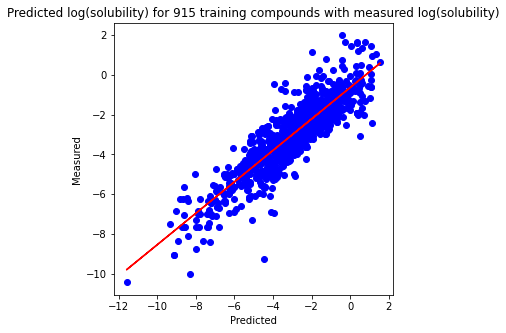

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(Y_train, linear_Y_train_pred, c='b')
z = np.polyfit(Y_train, linear_Y_train_pred, 1)
p = np.poly1d(z)
plt.plot(Y_train, p(Y_train), 'r-')
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.title("Predicted log(solubility) for 915 training compounds with measured log(solubility)")
plt.show()

### Applying the model on testing set

#### Predicting the testing set

In [ ]:
linear_Y_test_pred = linear.predict(X_test)
linear_Y_test_pred

array([-6.48324935, -5.00152856, -2.57080664,  0.56308874, -7.66503498,
       -4.12077858, -4.32545232, -2.20126131, -3.75204876, -1.59207   ,
       -2.8226715 , -3.65902081, -3.80402322, -1.11377604, -2.35441363,
       -3.18153649, -4.37720827, -2.4388994 , -0.44025688, -3.49934829,
       -4.1629847 , -3.00039149, -4.32545232, -3.23310938, -2.61774725,
       -2.70934893, -2.98398314, -5.44479114, -1.77424141, -5.56096917,
       -0.91269603, -0.8328579 , -2.09802754, -2.74508914, -2.44743098,
       -4.03570357, -2.3137413 , -1.70833561, -1.34946809, -2.64490456,
       -1.92798001, -3.966734  , -2.6994409 , -0.49785141, -1.27217475,
       -3.73914307, -3.58300605, -3.23869559, -0.68942384, -0.46232808,
       -3.24517919, -4.40749741, -2.55380474, -2.522004  , -3.5480807 ,
       -1.66614156, -4.43313124, -2.21634996, -3.01617923, -0.92936037,
       -1.54579092, -2.76079783, -3.58977554, -7.72084366, -3.7192641 ,
       -6.37363697, -7.43676923, -4.31070974, -3.66326376, -6.20

#### Calculating Coefficients and intercept

In [ ]:
print('Coefficients:', linear.coef_)
print('Intercept:', linear.intercept_)

Coefficients: [-0.77806823 -0.00653199  0.01580649 -0.04717242  0.19970495 -0.01521894
 -0.25443992  1.16321564]
Intercept: 0.1179908088718693


#### Calculating Root Mean Squared Error (RMSE)

In [ ]:
rmse_linear_Y_test_pred = sqrt(mean_squared_error(Y_test, linear_Y_test_pred))
rmse_linear_Y_test_pred

0.9928015440533184

#### Calculating R^2 Score

In [ ]:
linear_Y_test_score = r2_score(Y_test, linear_Y_test_pred)
linear_Y_test_score

0.7789840586048731

#### Visualizing the prediction

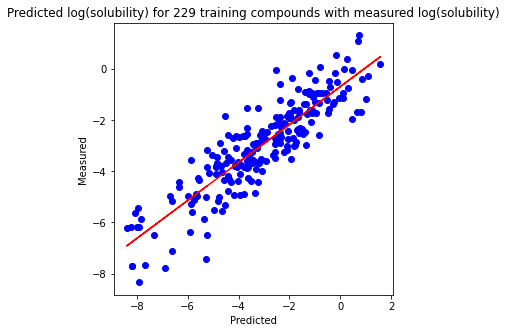

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, linear_Y_test_pred, c='b')
z = np.polyfit(Y_test, linear_Y_test_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test), 'r-')
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.title("Predicted log(solubility) for 229 training compounds with measured log(solubility)")
plt.show()

### Linear Regression Equation

In [ ]:
print('LogS = %.2f %.2f clogP %.4f MWT + %.4f RB %.2f HBD + %.2f HBA  %.2f TPSA  %.2f AP + %.2f NCP' % (linear.intercept_, linear.coef_[0], linear.coef_[1], linear.coef_[2], linear.coef_[3], linear.coef_[4], linear.coef_[5], linear.coef_[6], linear.coef_[7]))

LogS = 0.12 -0.78 clogP -0.0065 MWT + 0.0158 RB -0.05 HBD + 0.20 HBA  -0.02 TPSA  -0.25 AP + 1.16 NCP


## Applying Artificial Neural Network (ANN) model

### Building the Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()
ann.add(Dense(60, input_dim=8, activation='tanh'))
ann.add(Dense(40, input_dim=60, activation='tanh'))
ann.add(Dense(20, input_dim=40, activation='tanh'))
ann.add(Dense(7, input_dim=20, activation='tanh'))
ann.add(Dense(1, input_dim=7, activation='linear'))

### Compiling the model

In [ ]:
tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
ann.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')

### Model Summary

In [ ]:
ann.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2f87cd65d0>>

### Fitting the Model

In [ ]:
ann.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.10, verbose=True)

Epoch 1/100
26/26 [==============================] - 1s 15ms/step - loss: 5.1593 - mse: 5.1593 - val_loss: 4.2137 - val_mse: 4.2137
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 4.1710 - mse: 4.1710 - val_loss: 3.9780 - val_mse: 3.9780
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 3.9377 - mse: 3.9377 - val_loss: 3.8057 - val_mse: 3.8057
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 3.7578 - mse: 3.7578 - val_loss: 3.6351 - val_mse: 3.6351
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 3.6314 - mse: 3.6314 - val_loss: 3.5152 - val_mse: 3.5152
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 3.4981 - mse: 3.4981 - val_loss: 3.3814 - val_mse: 3.3814
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 3.3811 - mse: 3.3811 - val_loss: 3.2077 - val_mse: 3.2077
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 3.1754 - 

### Applying the model on training set

#### Predicting the training set

In [ ]:
ann_Y_train_pred = ann.predict(X_train)
ann_Y_train_pred

array([[-4.00639248e+00],
       [-1.23502517e+00],
       [-2.96832323e+00],
       [-5.23409653e+00],
       [-1.31493962e+00],
       [ 2.55753815e-01],
       [-3.34654689e-01],
       [-2.94560552e-01],
       [-3.42398787e+00],
       [-1.43168139e+00],
       [-1.59967828e+00],
       [-3.88759184e+00],
       [-4.65007067e+00],
       [-3.46167421e+00],
       [-3.48433316e-01],
       [-3.60236502e+00],
       [-3.30622959e+00],
       [-5.65938520e+00],
       [-9.65720773e-01],
       [-6.13482237e+00],
       [-1.41999722e+00],
       [-1.76139271e+00],
       [-8.59205961e-01],
       [-7.68322849e+00],
       [-1.33788776e+00],
       [-4.99091911e+00],
       [-3.15184546e+00],
       [-2.11227703e+00],
       [-5.95879853e-01],
       [-3.56265736e+00],
       [-2.14563084e+00],
       [-4.29813814e+00],
       [-7.05219746e+00],
       [-6.20688200e+00],
       [-6.20688200e+00],
       [-4.93565655e+00],
       [-8.93412709e-01],
       [-4.04077959e+00],
       [-4.1

#### Calculating Root Mean Squared Error

In [ ]:
rmse_ann_Y_train_pred = sqrt(mean_squared_error(Y_train, ann_Y_train_pred))
rmse_ann_Y_train_pred

0.6787770566329405

#### Calculating R^2 Score

In [ ]:
ann_Y_train_score = r2_score(Y_train, ann_Y_train_pred)
ann_Y_train_score

0.8946729217646489

### Applying the model on testing set

#### Predicting the testing set

In [ ]:
ann_Y_test_pred = ann.predict(X_test)
ann_Y_test_pred

array([[-6.281556  ],
       [-6.206882  ],
       [-2.3622189 ],
       [-0.5200738 ],
       [-7.7098417 ],
       [-4.4002385 ],
       [-4.813712  ],
       [-2.982461  ],
       [-4.3627753 ],
       [-0.81900966],
       [-2.7449164 ],
       [-3.3889017 ],
       [-4.739878  ],
       [ 0.15144843],
       [-1.3980234 ],
       [-3.318974  ],
       [-4.281609  ],
       [-1.4039867 ],
       [-1.3000422 ],
       [-3.2557402 ],
       [-4.79083   ],
       [-2.849104  ],
       [-4.813712  ],
       [-2.7282505 ],
       [-4.3237267 ],
       [-2.6045098 ],
       [-1.8250039 ],
       [-7.5861106 ],
       [-1.0276506 ],
       [-4.887213  ],
       [-0.53206545],
       [-1.1426219 ],
       [-0.9657208 ],
       [-2.9109292 ],
       [-2.3568864 ],
       [-4.4526525 ],
       [-3.7631512 ],
       [-1.1153967 ],
       [-0.62971735],
       [-2.9622297 ],
       [-2.3822813 ],
       [-3.20785   ],
       [-2.1902533 ],
       [ 0.11304587],
       [-0.45111722],
       [-3

#### Calculating Root Mean Squared Error

In [ ]:
rmse_ann_Y_test_pred = sqrt(mean_squared_error(Y_test, ann_Y_test_pred))
rmse_ann_Y_test_pred

0.7307474314526945

#### Calculating R^2 Score

In [ ]:
ann_Y_test_score = r2_score(Y_test, ann_Y_test_pred)
ann_Y_test_score

0.8802616396813887

## Creating Molecule Number Array

In [ ]:
mol_numbers = np.arange(1, 230, 1).reshape(229,1)
mol_numbers

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

## Visualizing the prediction values of Linear Regression Model and ANN Model on the measured values of Log(solubility(Mol/L))

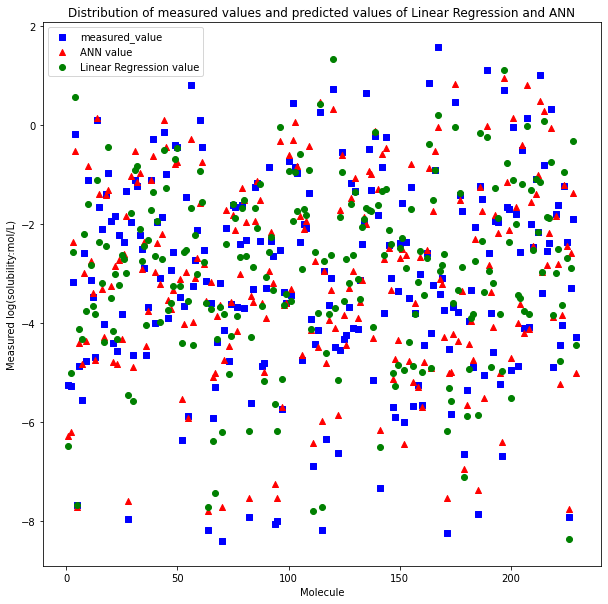

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(mol_numbers, Y_test, c='b', marker='s', label="measured_value")
plt.scatter(mol_numbers, ann_Y_test_pred, c='r', marker='^', label="ANN value")
plt.scatter(mol_numbers, linear_Y_test_pred, c='g', marker='o', label="Linear Regression value")
plt.xlabel("Molecule")
plt.ylabel("Measured log(solubility:mol/L)")
plt.title("Distribution of measured values and predicted values of Linear Regression and ANN")
plt.legend()
plt.show()